# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/2023-Sysoeva-TimeSeriesCourse/practice/05 Snippets')

Импорт библиотек и модулей

In [4]:
!pip install stumpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 2.6 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

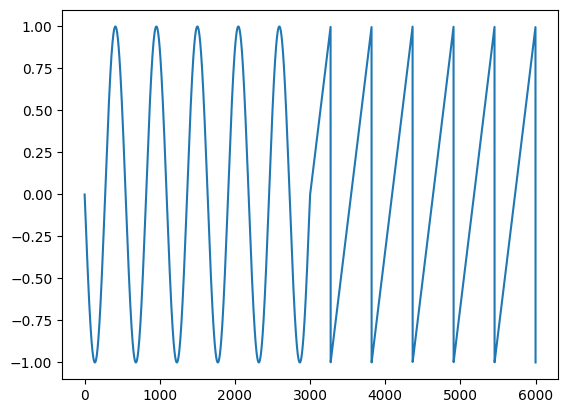

In [6]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [7]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


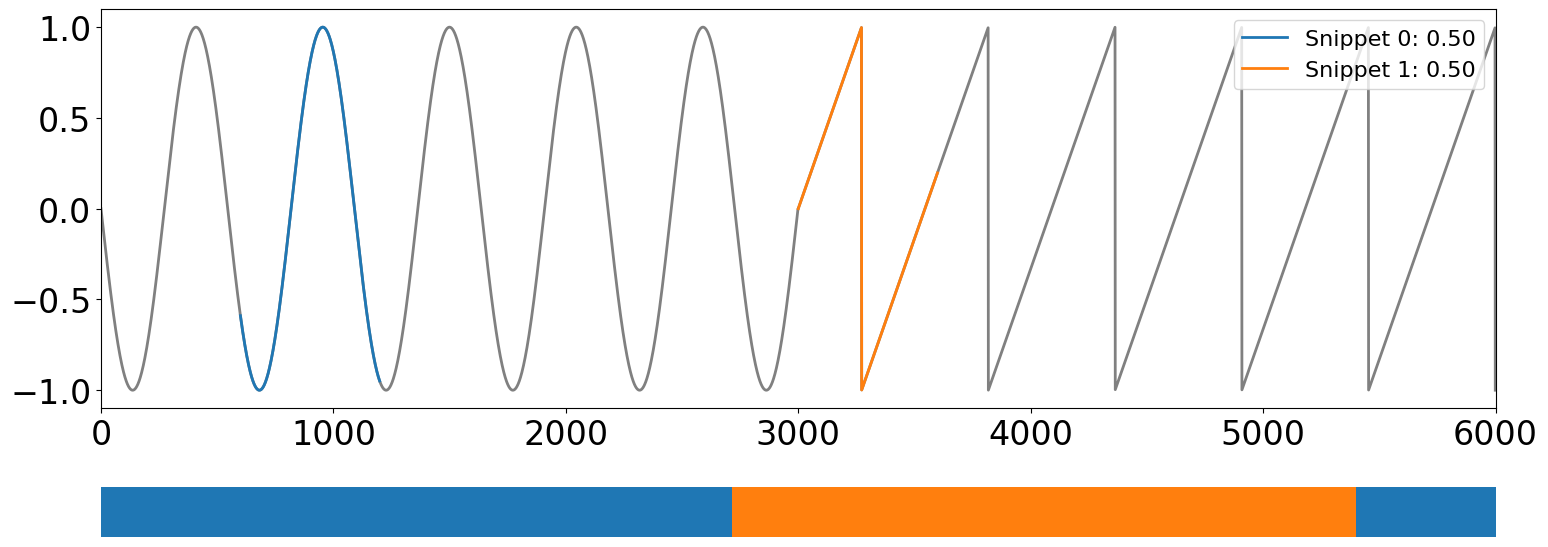

<Axes: >

In [ ]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «X» (угол крена) на временном интервале от 950 сек. до 109 сек.** из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из модуля snippets.py.

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv(r'datasets/PAMAP/PAMAP.txt', sep=' ', header=None).T

In [10]:
start_time = 850
end_time = 880

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10].to_numpy()
snp = snippets(ts, 500, 2, percentage=0.5)

In [14]:
snp

(array([[-6.22735e-02, -4.65563e-02, -2.10669e-03, -2.54615e-02,
         -1.33512e-02, -1.89558e-02, -8.33800e-02, -5.11423e-02,
          7.17531e-02,  7.40273e-02,  1.29048e-01,  1.76944e-01,
          2.27898e-01,  2.76548e-01,  2.35385e-01,  1.72768e-01,
          1.23571e-01,  1.55238e-01,  2.36283e-01,  2.12042e-01,
          2.52519e-01,  2.19720e-01,  1.98950e-01,  2.45539e-01,
          3.07209e-01,  3.66107e-01,  3.76376e-01,  4.14461e-01,
          4.33823e-01,  4.36275e-01,  4.81384e-01,  5.92844e-01,
          6.13126e-01,  6.72813e-01,  6.82111e-01,  6.56999e-01,
          6.10329e-01,  5.74583e-01,  4.81057e-01,  4.70921e-01,
          4.50259e-01,  4.73327e-01,  4.68888e-01,  4.63092e-01,
          4.75817e-01,  4.06307e-01,  2.60105e-01,  2.28144e-01,
          2.12446e-01,  3.05818e-01,  3.37046e-01,  2.55018e-01,
          7.42364e-02, -4.49920e-02, -2.83311e-02, -1.61709e-02,
         -3.13074e-02, -1.23784e-02, -9.97247e-02, -6.31291e-02,
         -8.51060e-02, -1

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

500


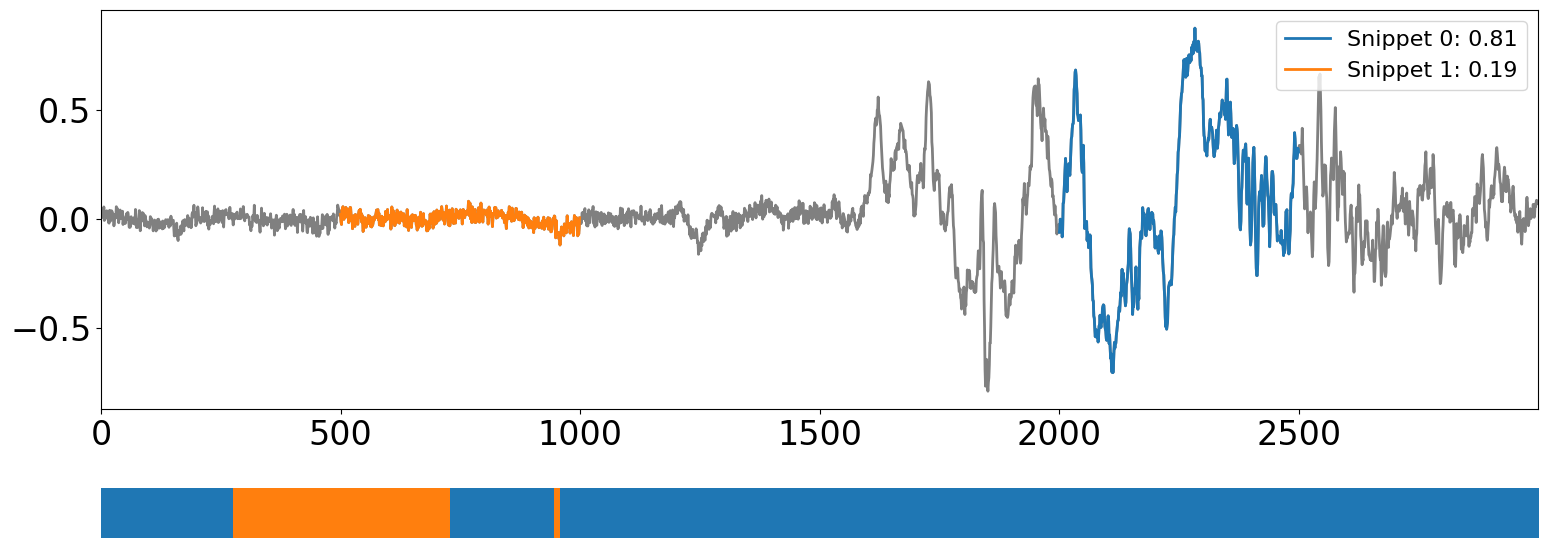

<Axes: >

In [11]:
plot_snippets(ts, snp)

In [ ]:
for i, snippet in enumerate(snp):
    neighbors = np.array(snippet["neighbors"]).astype(int)
    for neighbor_index in neighbors:
        labels_pred[neighbor_index] = i


Оцените точность разметки, полученной при помощи сниппетов.

In [13]:
from sklearn.metrics import accuracy_score

# get predicted labels (from plot_snippets)
labels_pred = np.zeros_like(ts)
for i, snippet in enumerate(snp):
    neighbors = np.array(snippet["neighbors"])
    for neighbor_index in neighbors:
        labels_pred[neighbor_index] = i

# get true labels
labels = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
labels = np.where(labels == 3, 1, labels)
labels = np.where(labels == 17, 0, labels)

accuracy_score(labels, labels_pred)

IndexError: ignored

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Поиск сниппетов позволяет делать кластеризацию во временных рядах

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1.

In [ ]:
start_time = 850
end_time = 880

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10:13].to_numpy()
ts.shape

(2999, 3)

Оцените точность разметки, полученной при помощи сниппетов.

In [ ]:
snp = []
snp.append(snippets(ts[:,0], 500, 2))
snp.append(snippets(ts[:,1], 500, 2))
snp.append(snippets(ts[:,2], 500, 2))

500


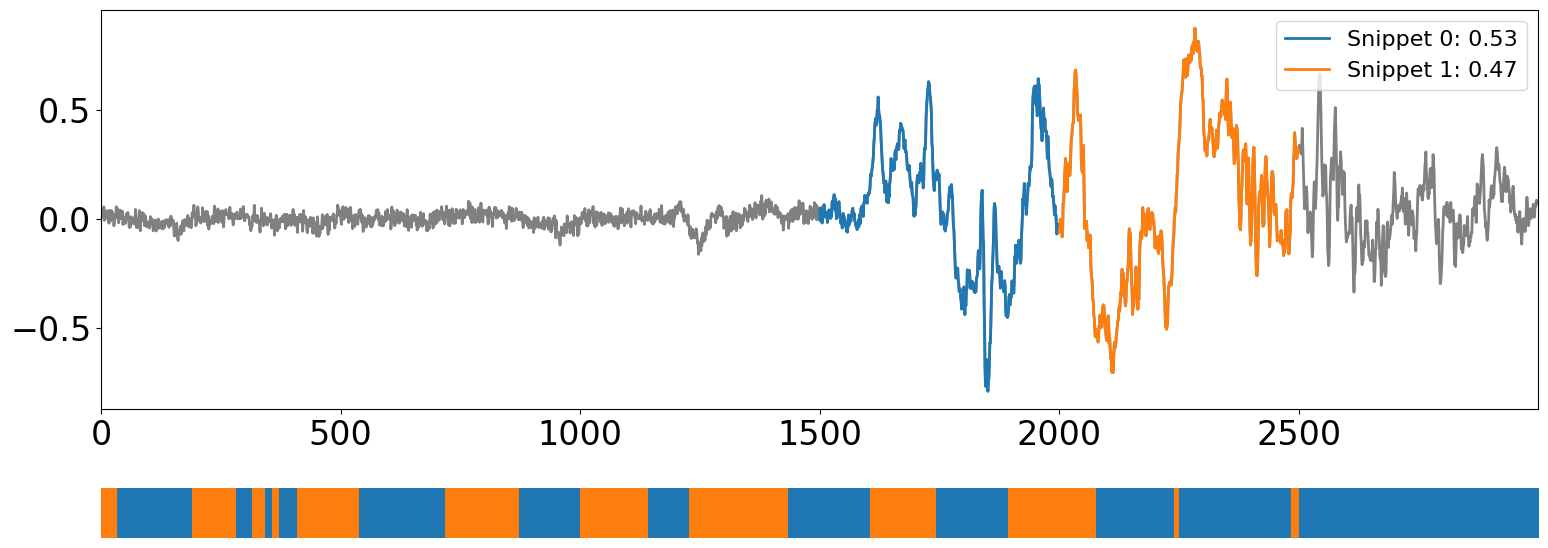

<Axes: >

In [ ]:
plot_snippets(ts[:,0], snp[0])

500


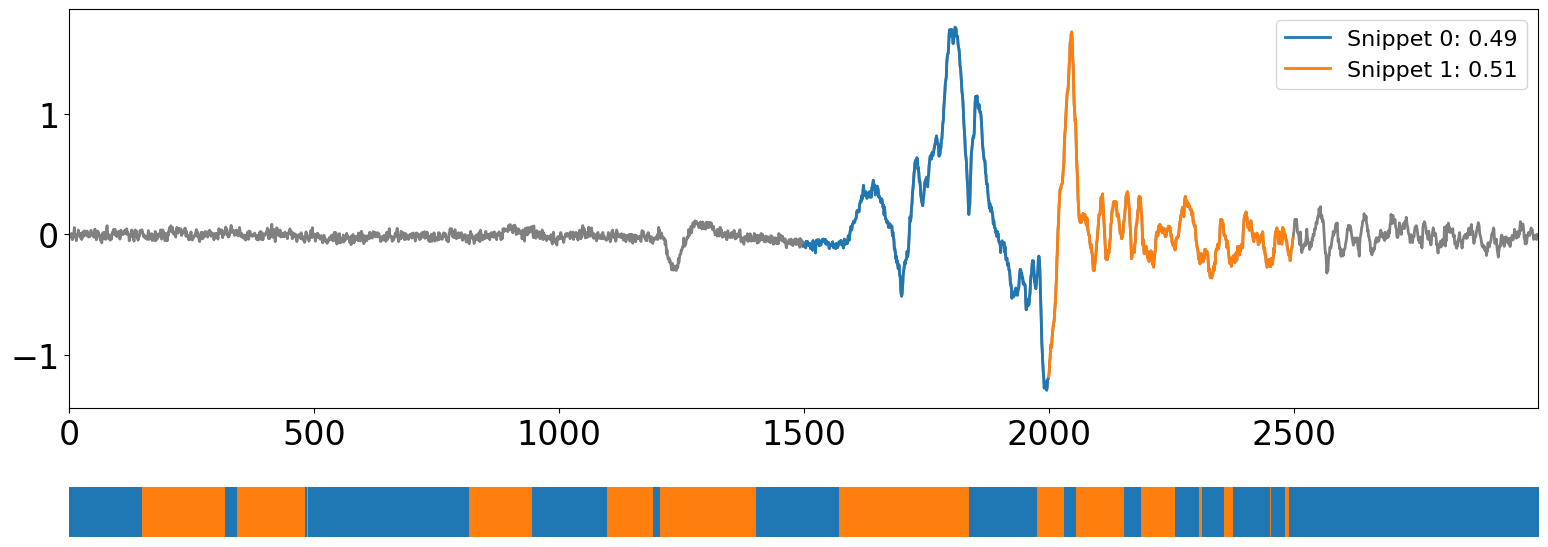

<Axes: >

In [ ]:
plot_snippets(ts[:,1], snp[1])

500


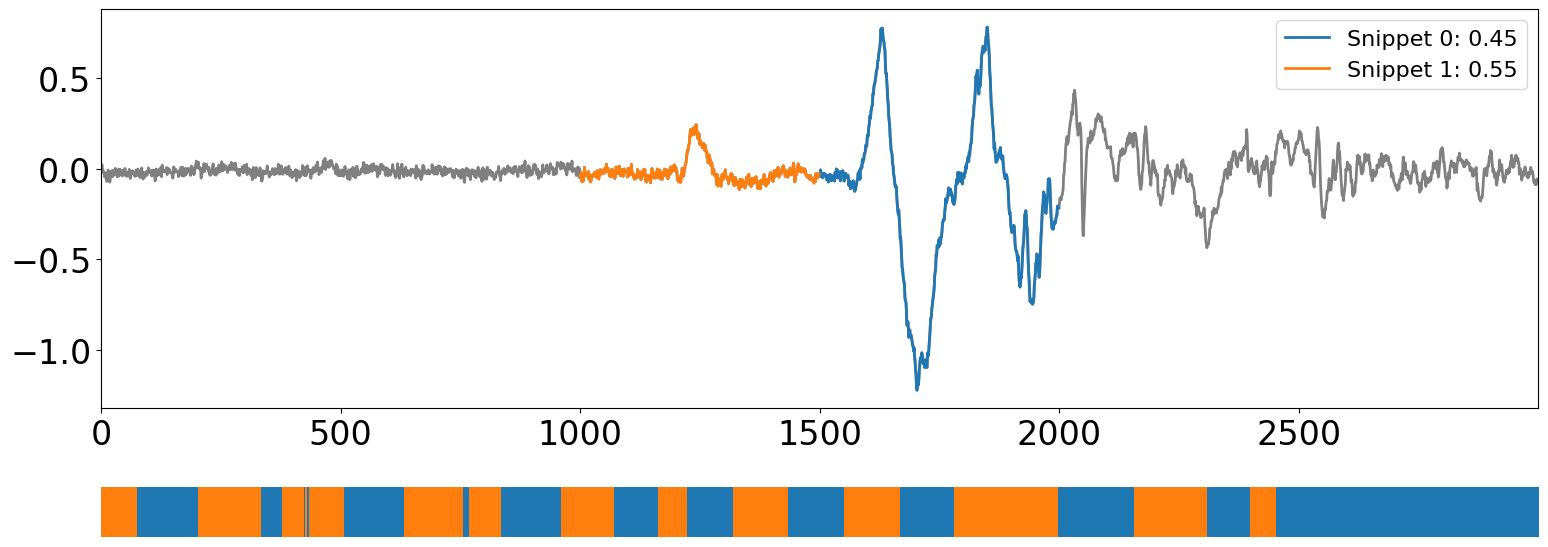

<Axes: >

In [ ]:
plot_snippets(ts[:,2], snp[2])

In [ ]:
for i, snp_1d in enumerate(snp):
    for j, snippet in enumerate(snp_1d):
      print(snippet)

In [ ]:
from sklearn.metrics import accuracy_score


def get_1d_label(labels_3d):
    labels = [0 for _ in range(len(labels_3d))]
    for i in range(len(labels_3d)):
        counter = {}
        for label in labels_3d[i]:
            if label in counter:
                counter[label] += 1
            else:
                counter[label] = 1
        labels[i] = max(counter, key=counter.get)
    return labels


# get predicted labels (from plot_snippets)
labels_pred_3d = np.zeros_like(ts)
for i, snp_1d in enumerate(snp):
    for j, snippet in enumerate(snp_1d):
        neighbors = np.array(snippet["neighbors"])
        for neighbor_index in neighbors:
            labels_pred_3d[neighbor_index][i] = j

labels_pred_3d[:,1] = np.where(labels_pred_3d[:,1] == 0, 10, labels_pred_3d[:,1])
labels_pred_3d[:,1] = np.where(labels_pred_3d[:,1] == 1, 0, labels_pred_3d[:,1])
labels_pred_3d[:,1] = np.where(labels_pred_3d[:,1] == 10, 1, labels_pred_3d[:,1])

labels_pred = get_1d_label(labels_pred_3d)

# get true labels
labels = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
labels = np.where(labels == 3, 1, labels)
labels = np.where(labels == 17, 0, labels)

accuracy_score(labels, labels_pred)

IndexError: ignored

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [ ]:
import pandas as pd

df = pd.read_csv(r'datasets/PAMAP/PAMAP.txt', sep=' ', header=None).T

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [ ]:
start_time = 850
end_time = 880

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10].to_numpy()
ts.shape

(2999,)

In [ ]:
k = 9
prof_area = snippets(ts, 500, 2)[0]['snippet']

IndexError: ignored

In [ ]:
change = []
for i in range(1, 9):
    change.append(prof_area[i-1] / prof_area[i] - 1)

NameError: ignored

In [ ]:
import plotly.express as px

df = pd.DataFrame([range(1, 10), prof_area]).T
df.columns = ['k', 'ProfileArea']
px.bar(df, x='k', y='ProfileArea', labels={'k':'k', 'ProfileArea':'ProfileArea'})

NameError: ignored

In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


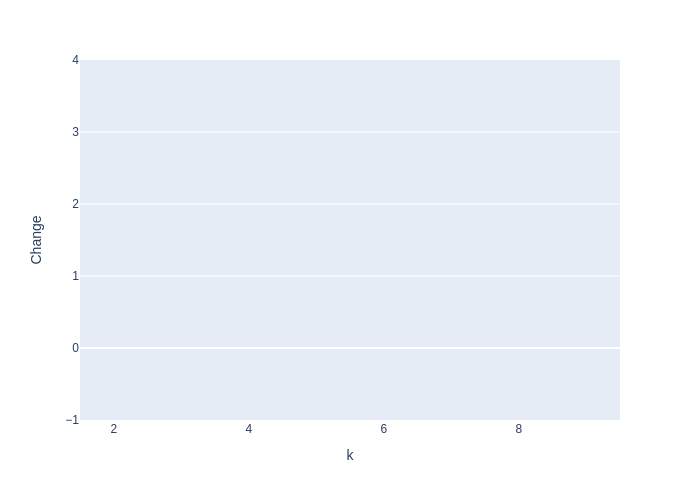

In [ ]:
df = pd.DataFrame([range(2, 10), change]).T
df.columns = ['k', 'Change']
fig = px.bar(df, x='k', y='Change', labels={'k':'k', 'Change':'Change'})
fig.show("png")

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?